# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import keras
from keras import layers
from keras.applications.vgg19 import VGG19

# Carga de datos desde la plataforma Kaggle

In [2]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [3]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=dcf7f039e569ce144baeb58e2d8ec8fdbe15159d97604e3117b68ec72973d4c7
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [4]:
BASE_FOLDER = "./07MIAR_Proyecto_Programacion/"
os.makedirs(BASE_FOLDER,exist_ok=True)

In [5]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp $BASE_FOLDER/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38           3357         67  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                                   3KB  2024-03-02 18:50:30          30318        585  0.9411765        
nayanack/netflix                                       Netflix Chronicles: Exploring Movies and TV Shows     1MB  2024-04-16 07:36:08           1076         23  0.88235295       
sakshisatre/social-advertisement-dataset               Social Media Consumer Buying Behavior Dataset     

In [7]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición

!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100% 1.95G/1.96G [01:10<00:00, 27.6MB/s]
100% 1.96G/1.96G [01:10<00:00, 29.7MB/s]


In [8]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [9]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip -qq 100-bird-species.zip -d my_dataset

# Exploración de la base de datos

Se trata de una base de datos con imágenes de aves. La tarea consiste en clasificar de qué especie es el pájaro que se muestra en la imágen.

## Se muestra una imagen aleatoria

Text(0.5, 1.0, 'AMERICAN FLAMINGO')

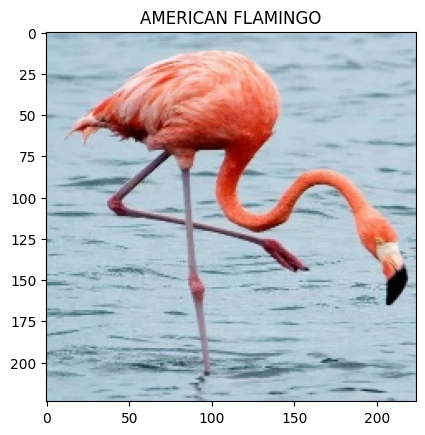

In [19]:
# Escogiendo y mostrando una imagen al azar del conjunto de test
idx = np.random.randint(1, 6)
bird = random.choice(os.listdir('my_dataset/test'))
img = cv2.imread(f'my_dataset/test/{bird}/{idx}.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(bird)

## Creación del dataset y data generator para entrenar


In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 128
train_dataset = image_dataset_from_directory(
 "my_dataset/train",
    image_size=(224, 224),
    batch_size=batch_size)
test_dataset = image_dataset_from_directory(
   "my_dataset/test",
    image_size=(224, 224),
    batch_size=batch_size)
valid_dataset = image_dataset_from_directory(
   "my_dataset/valid",
    image_size=(224, 224),
    batch_size=batch_size)

print(f"Total dataset number of samples = {len(train_dataset)*batch_size + len(valid_dataset)*batch_size + len(test_dataset)*batch_size}")

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Total dataset number of samples = 90112


Hay unas 90.000 muestras pertenecientes a 525 clases distintas.

## Análisis del balance de clases

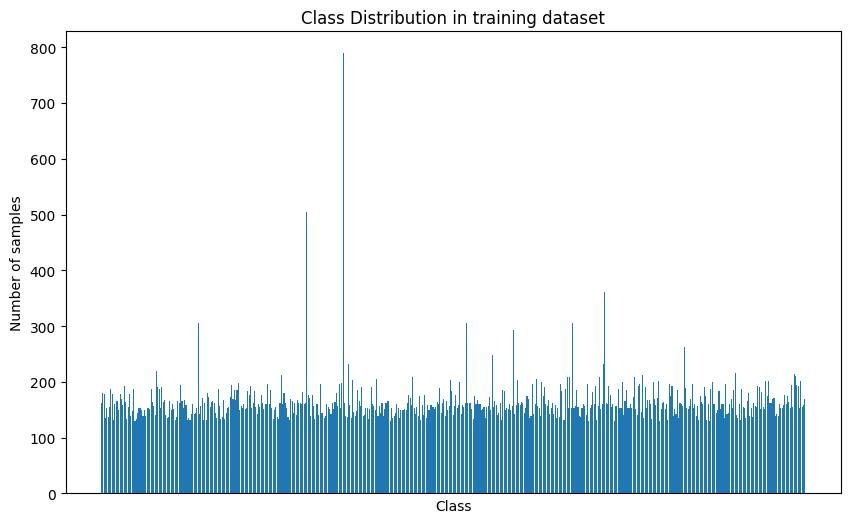

In [ ]:
dataset_path = 'my_dataset/train'

# Get class names
class_names = train_dataset.class_names

# Count the number of samples in each class
class_counts = {class_name: 0 for class_name in class_names}
for root, dirs, files in os.walk(dataset_path):
    for class_name in class_names:
        if class_name in root:
            class_counts[class_name] += len(files)
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution in training dataset')
plt.xticks([])
plt.show()

Se puede observar que, salvo unas 10 clases que están mayormente representadas, todas las clases tienen algo menos de 200 muestras.

## Se muestran las clases mayormente representadas

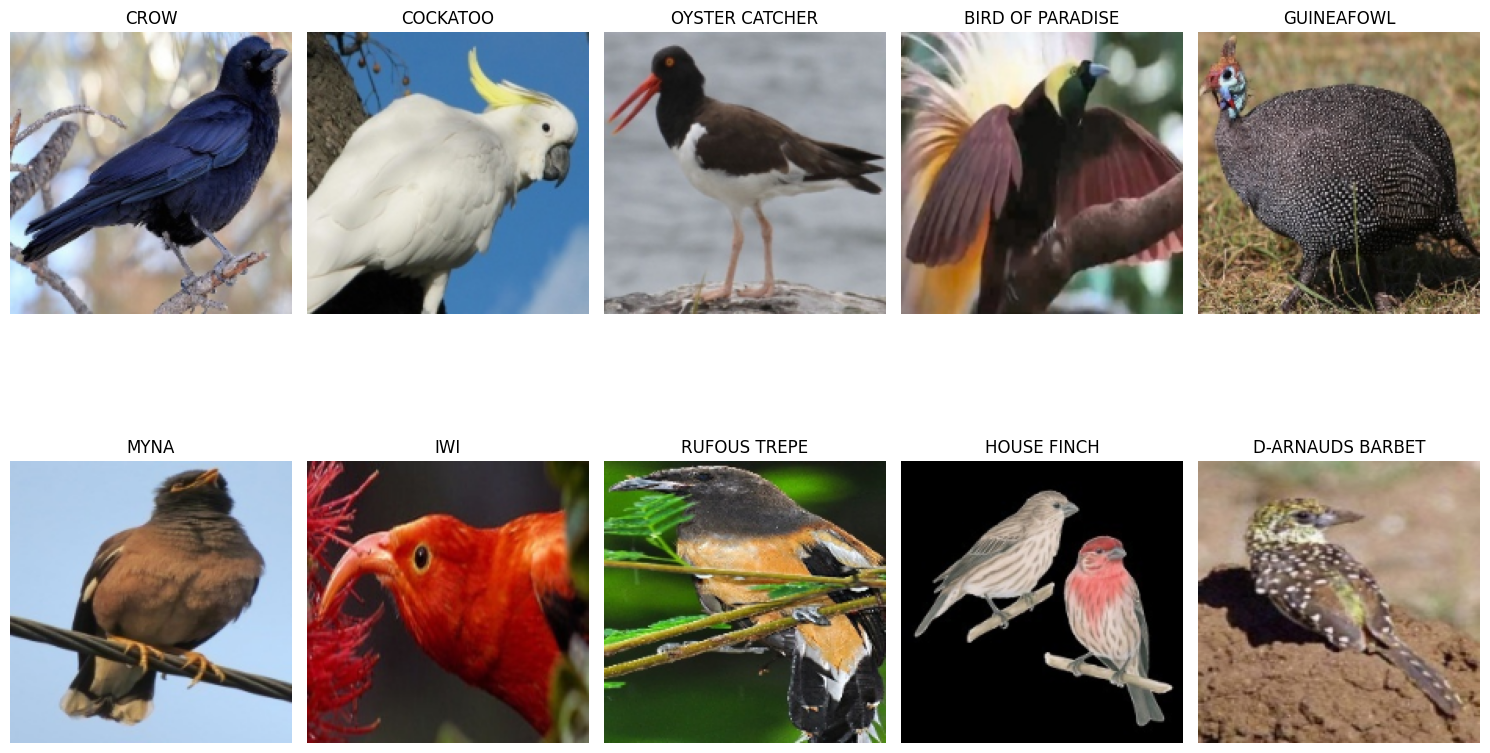

In [ ]:
# Sort the classes based on the number of samples and select the top N
sorted_classes = sorted(class_counts.items(), key=lambda item: item[1], reverse=True)
top_classes = sorted_classes[:10]
plt.figure(figsize=(15, 10))

for i, (class_name, _) in enumerate(top_classes, 1):
    class_dir = os.path.join(dataset_path, class_name)
    random_image_file = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, random_image_file)

    # Use OpenCV to read and resize the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))

    # Convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Acondicionamiento de los datos

*   Para el acondicionamiento de los datos se va a realizar un diezmado de la resolución de la imagen para reducir el número de operaciones en la convolución.
*   Se mantendrán los tres canales de la imagen, puesto que el color del ave es discriminativo en cuanto a la clasificación de la especie y facilitará el aprendizaje de la red.

Se visualiza un ejemplo del resultado del acondicionamiento de los datos

Text(0.5, 1.0, 'AMERICAN FLAMINGO')

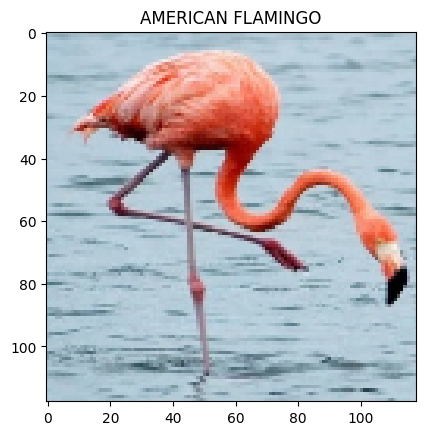

In [21]:
data_conditioning = keras.Sequential(
    [
        layers.Resizing(118,118),
        layers.Rescaling(1./255),
    ]
)
conditioned_img = data_conditioning(img)
plt.imshow(conditioned_img)
plt.title(bird)

# Implementación y entrenamiento de una CNN *from scratch*
Se realiza un entrenamiento de una red preliminar para ver cómo se comporta con el conjunto de datos.
Cabe resaltar que:
* Pese a que no se ha realizado una búsqueda exhaustiva de los mejores hiperparámetros. A lo largo de toda la experimentación, los mejores hiperparámetros que se han encontrado para el entrenamiento de la cnn son *batch size* = 128 y *learning rate* = 0.001

In [ ]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resizing_18 (Resizing)      (None, 118, 118, 3)       0         
                                                                 
 rescaling_20 (Rescaling)    (None, 118, 118, 3)       0         
                                                                 
 batch_normalization_60 (Ba  (None, 118, 118, 3)       12        
 tchNormalization)                                               
                                                                 
 conv2d_60 (Conv2D)          (None, 116, 116, 32)      896       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 58, 58, 32)        0         
 ng2D)                                                    

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_FOLDER}/checkpoints/CNN/best_small_model.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                                  mode='max',
                                  monitor="val_accuracy")]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/20
662/662 [==============================] - 71s 97ms/step - loss: 3.4781 - accuracy: 0.0043 - val_loss: 1.7812 - val_accuracy: 0.0062
Epoch 2/20
662/662 [==============================] - 62s 87ms/step - loss: 1.4417 - accuracy: 0.0070 - val_loss: 1.2633 - val_accuracy: 0.0071
Epoch 3/20
662/662 [==============================] - 57s 84ms/step - loss: 0.6855 - accuracy: 0.0083 - val_loss: 1.2833 - val_accuracy: 0.0074
Epoch 4/20
662/662 [==============================] - 58s 85ms/step - loss: 0.3332 - accuracy: 0.0090 - val_loss: 1.4166 - val_accuracy: 0.0073
Epoch 5/20
662/662 [==============================] - 51s 76ms/step - loss: 0.2608 - accuracy: 0.0091 - val_loss: 1.5132 - val_accuracy: 0.0073
Epoch 6/20
662/662 [==============================] - 53s 79ms/step - loss: 0.2426 - accuracy: 0.0091 - val_loss: 1.4972 - val_accuracy: 0.0074
Epoch 7/20
662/662 [==============================] - 52s 78ms/step - loss: 0.2191 - accuracy: 0.0092 - val_loss: 1.5429 - val_accuracy:

En vista de que la red no es capaz de converger. Aumentaremos el número de parámetros de la siguiente forma:
* Añadiendo capas convolucionales
* Extendiendo el número de mapas de características a la salida de la red convolucional
* Eliminando el *global max pooling* a la salida de la red y sustituyendolo por una capa *flatten* para tener en cuenta todas sus activaciones, además de la información posicional.

In [31]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu",padding="same")(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.1)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resizing_4 (Resizing)       (None, 118, 118, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 118, 118, 3)       0         
                                                                 
 batch_normalization_16 (Ba  (None, 118, 118, 3)       12        
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 116, 116, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 58, 58, 32)        0         
 ng2D)                                                     

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_FOLDER}/checkpoints/CNN/best_base_model.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                                  mode='max',
                                  monitor="val_accuracy")]

In [33]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/100
662/662 [==============================] - 63s 89ms/step - loss: 3.5934 - accuracy: 0.2853 - val_loss: 2.1783 - val_accuracy: 0.5204
Epoch 2/100
662/662 [==============================] - 58s 87ms/step - loss: 1.6483 - accuracy: 0.6080 - val_loss: 1.6710 - val_accuracy: 0.6400
Epoch 3/100
662/662 [==============================] - 61s 92ms/step - loss: 0.8272 - accuracy: 0.7838 - val_loss: 1.6360 - val_accuracy: 0.6682
Epoch 4/100
662/662 [==============================] - 59s 89ms/step - loss: 0.4378 - accuracy: 0.8740 - val_loss: 1.7131 - val_accuracy: 0.6937
Epoch 5/100
662/662 [==============================] - 63s 95ms/step - loss: 0.3112 - accuracy: 0.9078 - val_loss: 1.8613 - val_accuracy: 0.6819
Epoch 6/100
662/662 [==============================] - 59s 88ms/step - loss: 0.2510 - accuracy: 0.9257 - val_loss: 1.8748 - val_accuracy: 0.6918
Epoch 7/100
662/662 [==============================] - 59s 89ms/step - loss: 0.2226 - accuracy: 0.9351 - val_loss: 1.8293 - val_ac

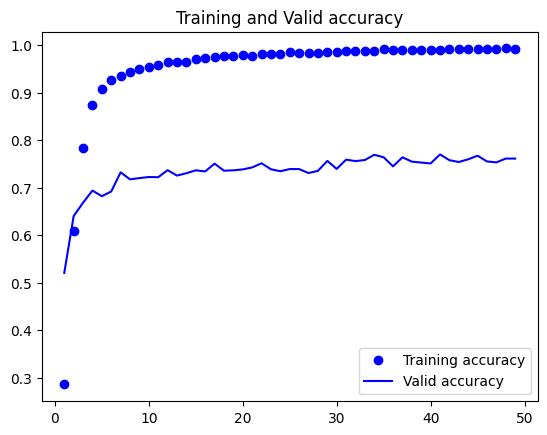

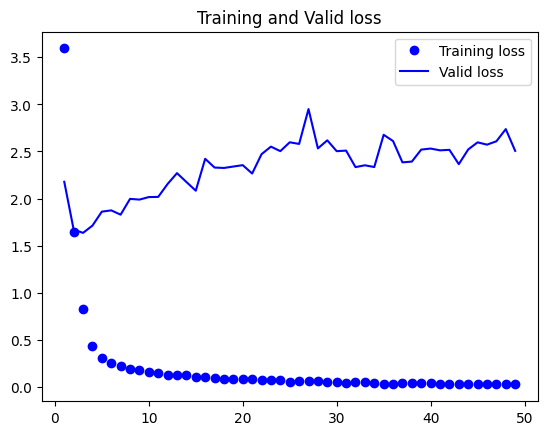

In [35]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

Se observa que una red con mayor número de parámetros se sobreajusta demasiado al conjunto de entrenamiento pero no es capaz de generaliar para los conjuntos de validación y test. Tras experimentar aumentando y disminuyendo la complejidad de la red, no se ha encontrado un equilibrio entre el underfitting y el overfitting. Por ello se recurre al data augmentation para generar más variedad en el conjunto de entrenamiento.
Se visualiza un ejemplo del aumento de los datos:

Text(0.5, 1.0, 'AMERICAN FLAMINGO')

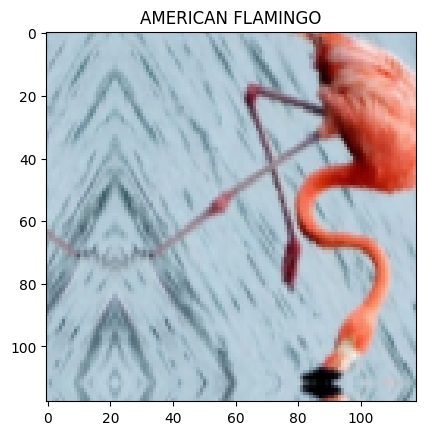

In [36]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomTranslation(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2))
    ]
)
augmented_img = data_augmentation(conditioned_img)
plt.imshow(augmented_img)
plt.title(bird)

Se integran las capas de data augmentation directamente a la entrada de la red, tras el acondicionamiento. De esta forma, se realiza de forma iterativa cada vez que se le pasa una muestra de entrenamiento a la red, generando una aumentación diferente de cada muestra en cada época. Este método da lugar a más aleatoriedad que generar las aumentaciones del conjunto de datos antes del entrenamiento.

Además de ello, se introduce una capa de dropout con p=0.1 en a la salida de la CNN.

In [25]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.RandomFlip("horizontal")(x)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomTranslation(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2))(x)


x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu",padding="same")(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.1)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resizing_3 (Resizing)       (None, 118, 118, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 118, 118, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 118, 118, 3)       0         
                                                                 
 random_rotation_4 (RandomR  (None, 118, 118, 3)       0         
 otation)                                                        
                                                                 
 random_translation_4 (Rand  (None, 118, 118, 3)       0         
 omTranslation)                                            

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_FOLDER}/checkpoints/CNN/best_model_data_augmentation.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                                  mode='max',
                                  monitor="val_accuracy")]

In [28]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/100
662/662 [==============================] - 65s 92ms/step - loss: 4.8320 - accuracy: 0.0921 - val_loss: 4.4849 - val_accuracy: 0.1459
Epoch 2/100
662/662 [==============================] - 61s 92ms/step - loss: 3.4394 - accuracy: 0.2529 - val_loss: 3.2178 - val_accuracy: 0.3261
Epoch 3/100
662/662 [==============================] - 61s 92ms/step - loss: 2.7602 - accuracy: 0.3726 - val_loss: 2.3835 - val_accuracy: 0.4621
Epoch 4/100
662/662 [==============================] - 62s 93ms/step - loss: 2.3365 - accuracy: 0.4541 - val_loss: 2.1964 - val_accuracy: 0.5025
Epoch 5/100
662/662 [==============================] - 61s 92ms/step - loss: 2.0301 - accuracy: 0.5134 - val_loss: 1.7306 - val_accuracy: 0.5905
Epoch 6/100
662/662 [==============================] - 61s 92ms/step - loss: 1.8062 - accuracy: 0.5610 - val_loss: 1.5388 - val_accuracy: 0.6442
Epoch 7/100
662/662 [==============================] - 61s 92ms/step - loss: 1.6393 - accuracy: 0.5952 - val_loss: 1.5357 - val_ac

Mostrar curva de entrenamiento

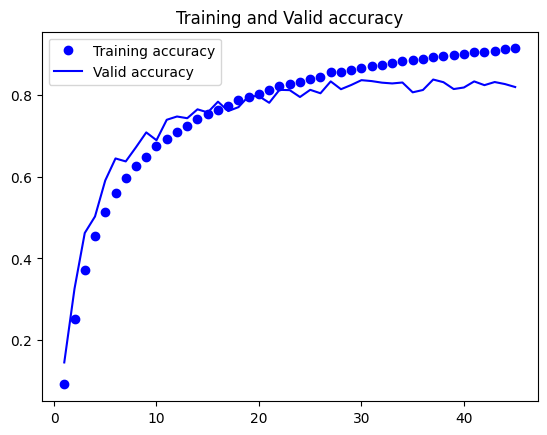

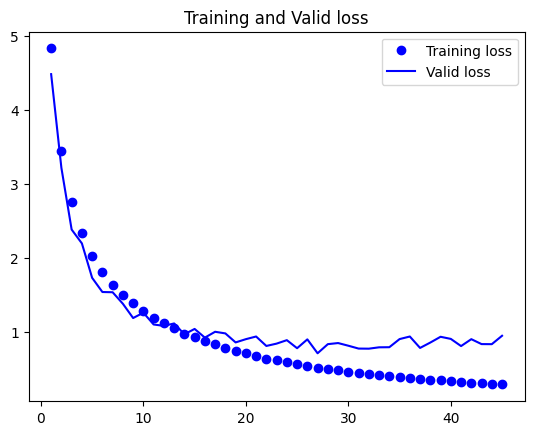

In [29]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

Se ha mitigado en gran medida el sobreajuste del modelo, llegando a alcanzar un **accuracy máximo en validación de 83,7%**

# VGG-19

In [37]:
# setting image size
IMAGE_SIZE = [ 224 , 224 , 3 ]

# Load the model
vgg = VGG19( include_top = False,
            input_shape = IMAGE_SIZE,classes=525,
            weights = 'imagenet')

# Flattened the last layer
x = layers.Flatten()(vgg.output)

# Created a new layer as output
prediction = layers.Dense( 525 , activation = 'softmax' )(x)

# Join it with the model
model = keras.Model( inputs = vgg.input , outputs = prediction )

# Congelar todas las capas de la red VGG19
for  layer in vgg.layers:
    layer.trainable = False

# Visualize the model again
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Se reduce el tamaño del batch por limitación de memoria de la GPU

In [38]:
batch_size = 64
train_dataset = image_dataset_from_directory(
 "my_dataset/train",
    image_size=(224, 224),
    batch_size=batch_size)
test_dataset = image_dataset_from_directory(
   "my_dataset/test",
    image_size=(224, 224),
    batch_size=batch_size)
valid_dataset = image_dataset_from_directory(
   "my_dataset/valid",
    image_size=(224, 224),
    batch_size=batch_size)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# compining the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
                                    f"{BASE_FOLDER}/checkpoints/VGG/vgg_features_base.keras",
                                    save_best_only=True,
                                    monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                              mode='max',
                              monitor="val_accuracy")]

In [42]:
history = model.fit(train_dataset,
                          validation_data = valid_dataset,
                          epochs = 100,
                          callbacks = callbacks)

Epoch 1/100
1323/1323 [==============================] - 298s 219ms/step - loss: 15.4299 - accuracy: 0.4280 - val_loss: 7.1046 - val_accuracy: 0.6811
Epoch 2/100
1323/1323 [==============================] - 293s 222ms/step - loss: 1.4828 - accuracy: 0.8845 - val_loss: 7.0430 - val_accuracy: 0.7048
Epoch 3/100
1323/1323 [==============================] - 292s 221ms/step - loss: 0.8248 - accuracy: 0.9278 - val_loss: 8.0409 - val_accuracy: 0.7086
Epoch 4/100
1323/1323 [==============================] - 295s 223ms/step - loss: 0.8273 - accuracy: 0.9348 - val_loss: 7.6656 - val_accuracy: 0.7337
Epoch 5/100
1323/1323 [==============================] - 487s 368ms/step - loss: 0.7213 - accuracy: 0.9474 - val_loss: 8.5654 - val_accuracy: 0.7398
Epoch 6/100
1323/1323 [==============================] - 297s 224ms/step - loss: 0.6310 - accuracy: 0.9550 - val_loss: 8.5480 - val_accuracy: 0.7600
Epoch 7/100
1323/1323 [==============================] - 298s 225ms/step - loss: 0.5254 - accuracy: 0.963

KeyboardInterrupt: 

Se ha detenido el entrenamiento anterior, dado el gran sobreajuste que se estaba produciendo y el elevado tiempo de entrenamiento, no valía la pena esperar que el *early stopping callback* detuviese el entrenamiento.

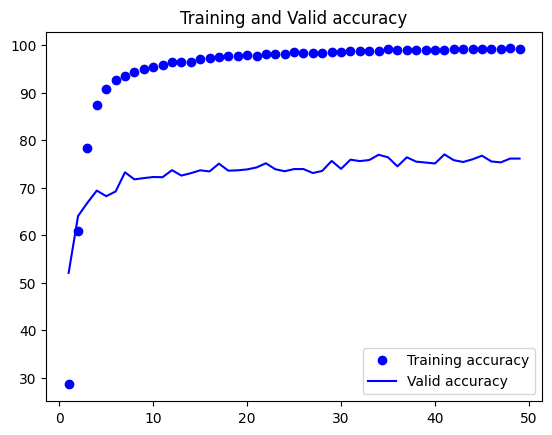

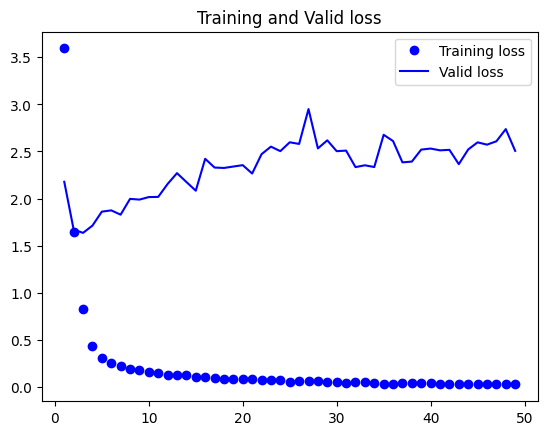

In [43]:
accuracy = 100*np.array(history.history["accuracy"])
val_accuracy = 100*np.array(history.history["val_accuracy"])
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

En vista de que el modelo sobreajusta demasiado al conjunto de entrenamiento, se introduce data augmentation y dropout para reducir el overfitting.

In [44]:
# setting image size
IMAGE_SIZE = [ 224 , 224 , 3 ]

# Load the model
vgg = VGG19( include_top = False,
            input_shape = IMAGE_SIZE,classes=525,
            weights = 'imagenet')

# Data augmentation
inputs = keras.Input(shape=IMAGE_SIZE)

x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomTranslation(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2))(x)

# Vgg feature extraction
x = vgg(x)

# Flattened the last layer
x = layers.Flatten()(x)

# Dropout
x = layers.Dropout(rate=0.3)(x)

# Created a new layer as output
prediction = layers.Dense( 525 , activation = 'softmax' )(x)

# Join it with the model
model = keras.Model( inputs = inputs , outputs = prediction )

# Congelar todas las capas de la red VGG19
for  layer in vgg.layers:
    layer.trainable = False

# Visualize the model again
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_flip_6 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_6 (RandomR  (None, 224, 224, 3)       0         
 otation)                                                        
                                                                 
 random_translation_6 (Rand  (None, 224, 224, 3)       0         
 omTranslation)                                                  
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0   

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# compining the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
callbacks = [
        keras.callbacks.ModelCheckpoint(
                                        f"{BASE_FOLDER}/checkpoints/VGG/vgg_features_augmented.keras",
                                        save_best_only=True,
                                        monitor="val_accuracy"),
        keras.callbacks.EarlyStopping(patience=5,
                                      monitor='val_accuracy',
                                      mode='max')]

In [51]:
history = model.fit(train_dataset,
                          validation_data = valid_dataset,
                          epochs = 40,
                          callbacks = callbacks)

Epoch 1/40
1323/1323 [==============================] - 184s 139ms/step - loss: 2.6778 - accuracy: 0.6984 - val_loss: 1.7521 - val_accuracy: 0.7859
Epoch 2/40
1323/1323 [==============================] - 172s 130ms/step - loss: 0.3129 - accuracy: 0.9480 - val_loss: 1.7489 - val_accuracy: 0.8114
Epoch 3/40
1323/1323 [==============================] - 178s 135ms/step - loss: 0.2151 - accuracy: 0.9620 - val_loss: 2.3249 - val_accuracy: 0.7977
Epoch 4/40
1323/1323 [==============================] - 181s 136ms/step - loss: 0.2668 - accuracy: 0.9593 - val_loss: 2.8603 - val_accuracy: 0.7764
Epoch 5/40
1323/1323 [==============================] - 181s 137ms/step - loss: 0.2461 - accuracy: 0.9642 - val_loss: 2.6502 - val_accuracy: 0.7992
Epoch 6/40
1323/1323 [==============================] - 184s 139ms/step - loss: 0.2140 - accuracy: 0.9701 - val_loss: 2.5177 - val_accuracy: 0.8213
Epoch 7/40
1323/1323 [==============================] - 181s 136ms/step - loss: 0.1688 - accuracy: 0.9758 - val_

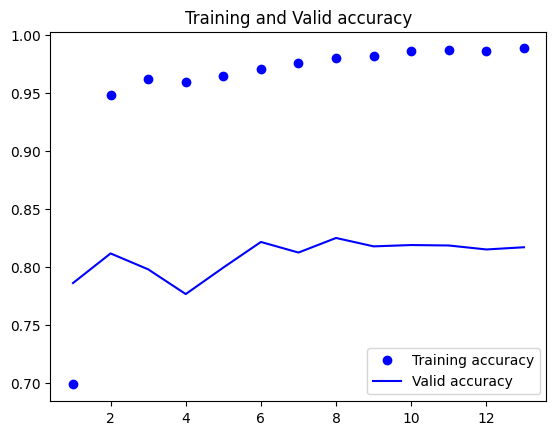

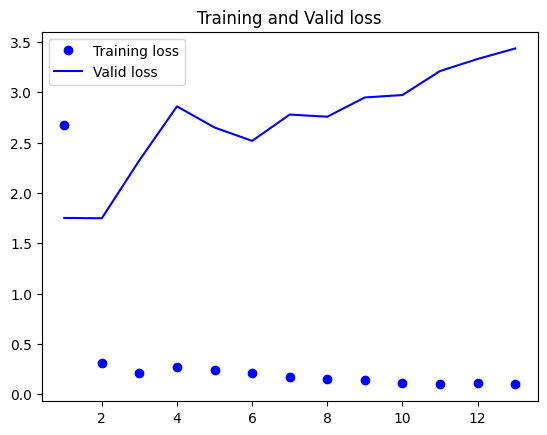

In [52]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

# ResNet-50

En base a la experimentación llevada a cabo anteriormente, se decide entenar la ResNet-50 llevando a cabo la misma estrategia que mejor ha funcionado tanto en la CNN *from scratch* y el transfer learning de la VGG:


*   Data augmentation
*   Dropout a la salida
*   Entrenando únicamente la capa de clasificación





In [61]:
inputs = keras.Input(shape=IMAGE_SIZE)
x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2))(x)
resnet = keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=x)
x = layers.Flatten()(resnet.output)
x = layers.Dropout(rate=0.3)(x)
predictions = layers.Dense(525, activation='softmax')(x)
model = keras.models.Model(inputs=inputs, outputs=predictions)
for layer in resnet.layers:
    layer.trainable = False
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 random_flip_13 (RandomFlip  (None, 224, 224, 3)          0         ['input_19[0][0]']            
 )                                                                                                
                                                                                                  
 random_rotation_13 (Random  (None, 224, 224, 3)          0         ['random_flip_13[0][0]']      
 Rotation)                                                                                        
                                                                                           

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# compining the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
callbacks = [
        keras.callbacks.ModelCheckpoint(
                                        f"{BASE_FOLDER}/checkpoints/RESNET/resnet_features_augmented.keras",
                                        save_best_only=True,
                                        monitor="val_accuracy"),
        keras.callbacks.EarlyStopping(patience=5,
                                      monitor='val_accuracy',
                                      mode='max')]

In [67]:
history = model.fit(train_dataset,
                          validation_data = valid_dataset,
                          epochs = 40,
                          callbacks = callbacks)

Epoch 1/40
1323/1323 [==============================] - 217s 164ms/step - loss: 4.6490 - accuracy: 0.5119 - val_loss: 2.1270 - val_accuracy: 0.7410
Epoch 2/40
1323/1323 [==============================] - 261s 197ms/step - loss: 4.3382 - accuracy: 0.5750 - val_loss: 2.0877 - val_accuracy: 0.7695
Epoch 3/40
1323/1323 [==============================] - 224s 169ms/step - loss: 4.1027 - accuracy: 0.6120 - val_loss: 2.1110 - val_accuracy: 0.7825
Epoch 4/40
1323/1323 [==============================] - 228s 172ms/step - loss: 4.0179 - accuracy: 0.6360 - val_loss: 2.0530 - val_accuracy: 0.7947
Epoch 5/40
1323/1323 [==============================] - 215s 162ms/step - loss: 3.8522 - accuracy: 0.6607 - val_loss: 1.9806 - val_accuracy: 0.8160
Epoch 6/40
1323/1323 [==============================] - 211s 159ms/step - loss: 3.8309 - accuracy: 0.6764 - val_loss: 2.0543 - val_accuracy: 0.8103
Epoch 7/40
1323/1323 [==============================] - 211s 160ms/step - loss: 3.6993 - accuracy: 0.6906 - val_

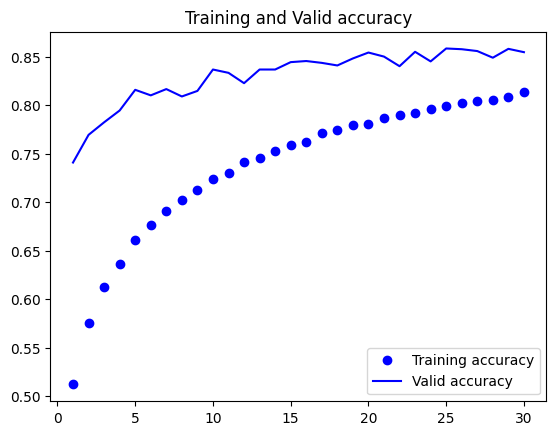

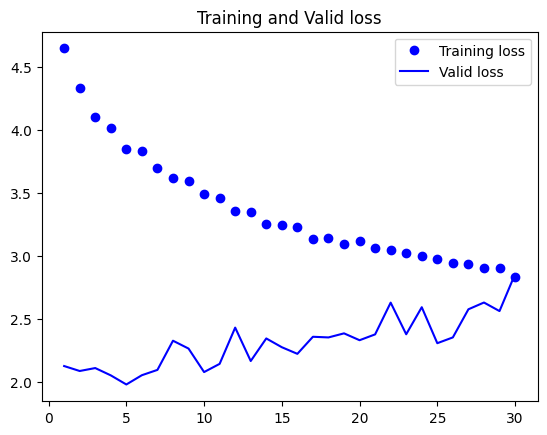

In [68]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

# Evaluación en test de las tres arquitecturas

In [70]:
cnn = keras.saving.load_model(f'{BASE_FOLDER}checkpoints/CNN/best_model_data_augmentation.keras')
cnn_acc = cnn.evaluate(test_dataset)

42/42 [==============================] - 3s 33ms/step - loss: 0.6023 - accuracy: 0.8617


In [71]:
vgg = keras.saving.load_model(f'{BASE_FOLDER}checkpoints/VGG/vgg_features_augmented.keras')
vgg_acc = vgg.evaluate(test_dataset)

42/42 [==============================] - 9s 207ms/step - loss: 7.8736 - accuracy: 0.8415


In [72]:
resnet = keras.saving.load_model(f'{BASE_FOLDER}checkpoints/RESNET/resnet_features_augmented.keras')
resnet_acc = resnet.evaluate(test_dataset)

42/42 [==============================] - 7s 120ms/step - loss: 1.6512 - accuracy: 0.8827


In [74]:
print(f"CNN trained from scratch test accuracy = {cnn_acc[-1]}")
print(f"VGG transfer learning test accuracy = {vgg_acc[-1]}")
print(f"ResNet transfer learning test accuracy = {resnet_acc[-1]}")

CNN trained from scratch test accuracy = 0.8617143034934998
VGG transfer learning test accuracy = 0.8415238261222839
ResNet transfer learning test accuracy = 0.8826666474342346


Tras la evaluación en el conjunto de test, se puede concluir que, de los modelos entrenados en el presente trabajo, el que mejor realiza la tarea de clasificación es la ResNet-50, ya que ha obtenido un mayor porcentaje de accuracy.
Las posibles mejoras del trabajo, mediante las cuales se podrían conseguir mejores resultados de test son:
*   Realizar una búsqueda de hiperparámetros para dar con la configuración de entrenamiento óptima para cada red.
*   Realizar fine-tuning de las redes preentrenadas con ImageNet, sustituyendo la capa flatten por alguna agregación como global average pooling o global max pooling.
*   Extender el entrenamiento de la ResNet y aumentar la paciencia del early stopping.
*   Integrar un learning rate scheduler para mejorar la búsqueda del mínimo global en la función de pérdidas

## Ejemplo de generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [75]:
%%capture
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir=./07MIAR_Proyecto_Programacion ./07MIAR_Proyecto_Programacion '$name_IPYNB_file' --to pdf"
        )